In [9]:
import numpy as np
import sys
import pandas as pd
import difflib
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'cartopy'

In [6]:
amenities = pd.read_json("amenities-vancouver.json.gz", lines=True)
amenities = amenities[amenities['name'].notna()]
print(amenities)

             lat         lon                      timestamp           amenity  \
0      49.260812 -123.125736  2020-03-20T18:22:12.000-07:00              cafe   
1      49.260953 -123.125704  2019-08-02T18:11:20.000-07:00         fast_food   
4      49.370898 -123.280448  2015-05-03T00:42:25.000-07:00  place_of_worship   
7      49.264041 -123.153407  2019-08-29T18:50:05.000-07:00              fuel   
13     49.126650 -123.182470  2020-03-30T09:08:51.000-07:00        restaurant   
...          ...         ...                            ...               ...   
17712  49.250408 -123.076261  2017-07-08T05:22:57.000-07:00        restaurant   
17713  49.278424 -122.806704  2013-03-26T23:45:49.000-07:00              cafe   
17714  49.278770 -122.797628  2013-03-26T23:45:49.000-07:00        restaurant   
17716  49.282666 -122.826978  2019-09-13T13:56:49.000-07:00               pub   
17717  49.282420 -122.826340  2019-09-13T13:56:49.000-07:00              cafe   

                           

In [119]:
amenities_types =amenities['amenity'].unique()
print(amenities_types)

['cafe' 'fast_food' 'place_of_worship' 'fuel' 'restaurant'
 'parking_entrance' 'pub' 'school' 'community_centre' 'pharmacy' 'dentist'
 'doctors' 'post_office' 'childcare' 'public_building' 'bank' 'cinema'
 'theatre' 'ferry_terminal' 'bar' 'library' 'car_rental' 'bicycle_rental'
 'clinic' 'public_bookcase' 'university' 'dojo' 'toilets' 'arts_centre'
 'ice_cream' 'bench' 'shelter' 'bicycle_parking' 'recycling'
 'drinking_water' 'fountain' 'veterinary' 'bureau_de_change' 'car_wash'
 'nightclub' 'social_facility' 'post_box' 'bus_station' 'college'
 'construction' 'post_depot' 'atm' 'nursery' 'clock' 'kindergarten'
 'conference_centre' 'vending_machine' 'car_sharing' 'marketplace'
 'hospital' 'taxi' 'police' 'fire_station' 'parking' 'motorcycle_parking'
 'charging_station' 'gambling' 'family_centre' 'townhall' 'waste_basket'
 'music_school' 'bistro' 'boat_rental' 'meditation_centre' 'spa'
 'scrapyard' 'language_school' 'courthouse' 'events_venue' 'prep_school'
 'food_court' 'healthcare' 'cr

In [120]:
def merge_similar_amentity(df): #merge amenities with similar/same amenity type
    df['amenity'] = df['amenity'].replace(['Pharmacy'], 'pharmacy')
    df['amenity'] = df['amenity'].replace(['gambling'], 'casino')
    df['amenity'] = df['amenity'].replace(['atm;bank'], 'bank')
    df['amenity'] = df['amenity'].replace(['motorcycle_parking'], 'parking')
    df['amenity'] = df['amenity'].replace(['drinking_water'], 'fountain')
    df['amenity'] = df['amenity'].replace(['parking_entrance'], 'parking')
    df['amenity'] = df['amenity'].replace(['doctors'], 'hospital')
    df['amenity'] = df['amenity'].replace(['storage'], 'storage_rental')
    df['amenity'] = df['amenity'].replace(['internet_cafe'], 'cafe')
    df['amenity'] = df['amenity'].replace(['childcare'], 'kindergarten')
    df['amenity'] = df['amenity'].replace(['chiropractor'], 'hospital')
    df['amenity'] = df['amenity'].replace(['post_depot'], 'post_office')
    return df

In [121]:
def remove_unnecessary_amentity(df):
    df.drop(df.index[df['amenity'] == 'disused:restaurant'], inplace = True)
    df.drop(df.index[df['amenity'] == 'car_rep'], inplace = True)   
    df.drop(df.index[df['amenity'] == 'watering_place'], inplace = True)
    df.drop(df.index[df['amenity'] == 'science'], inplace = True)   
    return df

In [122]:
amenities = merge_similar_amentity(amenities)
amenities =remove_unnecessary_amentity(amenities)
amenities_types =amenities['amenity'].unique()
print(amenities_types)

['cafe' 'fast_food' 'place_of_worship' 'fuel' 'restaurant' 'parking' 'pub'
 'school' 'community_centre' 'pharmacy' 'dentist' 'hospital' 'post_office'
 'kindergarten' 'public_building' 'bank' 'cinema' 'theatre'
 'ferry_terminal' 'bar' 'library' 'car_rental' 'bicycle_rental' 'clinic'
 'public_bookcase' 'university' 'dojo' 'toilets' 'arts_centre' 'ice_cream'
 'bench' 'shelter' 'bicycle_parking' 'recycling' 'fountain' 'veterinary'
 'bureau_de_change' 'car_wash' 'nightclub' 'social_facility' 'post_box'
 'bus_station' 'college' 'construction' 'atm' 'nursery' 'clock'
 'conference_centre' 'vending_machine' 'car_sharing' 'marketplace' 'taxi'
 'police' 'fire_station' 'charging_station' 'casino' 'family_centre'
 'townhall' 'waste_basket' 'music_school' 'bistro' 'boat_rental'
 'meditation_centre' 'spa' 'scrapyard' 'language_school' 'courthouse'
 'events_venue' 'prep_school' 'food_court' 'healthcare' 'cram_school'
 'workshop' 'safety' 'lobby' 'animal_shelter' 'juice_bar' 'social_centre'
 'studio' '

In [60]:
test = amenities.loc[amenities['amenity'] == 'bicycle_rental']

print(test)

             lat         lon                      timestamp         amenity  \
111    49.275700 -123.142450  2016-08-24T22:32:32.000-07:00  bicycle_rental   
113    49.277773 -123.120853  2016-08-19T18:55:24.000-07:00  bicycle_rental   
114    49.266710 -123.104820  2016-08-20T04:15:34.000-07:00  bicycle_rental   
359    49.287191 -123.112926  2016-08-11T22:47:16.000-07:00  bicycle_rental   
368    49.279659 -123.116293  2016-08-11T23:07:27.000-07:00  bicycle_rental   
...          ...         ...                            ...             ...   
16449  49.284870 -123.128767  2020-02-27T06:25:36.000-08:00  bicycle_rental   
16450  49.263953 -123.112659  2020-02-27T06:25:37.000-08:00  bicycle_rental   
16451  49.283327 -123.125259  2020-06-15T02:33:53.000-07:00  bicycle_rental   
16655  49.275855 -123.071902  2018-06-22T04:50:55.000-07:00  bicycle_rental   
17647  49.302610 -123.155640  2019-07-31T02:19:16.000-07:00  bicycle_rental   

                                         name  \
11

In [61]:
min_lat = amenities['lat'].min()
max_lat = amenities['lat'].max()
min_lon = amenities['lon'].min()
max_lon = amenities['lon'].max()
BBox = [min_lon,max_lon,min_lat, max_lat]
#print(min_lat,max_lat,min_lon,max_lon)


    

In [62]:
def density_plot(df,boundry):
    city_map = plt.imread('map.jpg')
    fig, location = plt.subplots(figsize = (16,14))
    location.scatter(test.lon, test.lat, c='b', s=10)
    location.set_title('Plotting locations in the city')
    location.set_xlim(boundry[0],boundry[1])
    location.set_ylim(boundry[2],boundry[3])
    location.imshow(city_map, zorder=0, extent = BBox, aspect= 'equal')

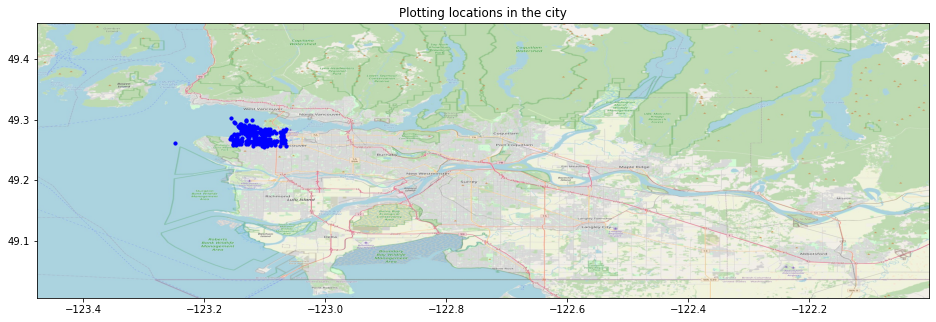

In [63]:
density_plot(test,BBox)
        